# Exercise Six: Structured Data with Beautiful Soup and Pandas

This week, you'll be revisiting some of the exercises we started this semester, but with more powerful tools. Instead of pulling raw HTML from a website, you'll use the structured data scraping methods to draw a dictionary of data from the web using Beautiful Soup, then parse and display it using Pandas.

As with last week, fill in the documentation as you go through each stage. Make sure to pick a site with a clear data structure for your analysis.



## Stage Five: Plot some Aspect of the Data
## Bonus Stage: Add On

Try:

- Iterating through multiple pages (all the pages of a database, for instance)

- Visualizing using another method from our discussion or readings

- Storing your data and / or visualization for external analysis

## Stage One: Import the libraries and Scrape your Page

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd



In [17]:
url = 'https://www.metacritic.com/game/playstation-4/madden-nfl-20/user-reviews'

user_agent = {'User-agent': 'Mozilla/5.0'}
response = requests.get(url, headers = user_agent)

soup = BeautifulSoup(response.text, 'html.parser')

## Stage Two: Define an Empty Dictionary Reflecting the Data Categories

In [18]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}

## Stage Three: Loop through and Store Structured Data

In [19]:
# we are finding every review in the text
# need to look at content (inspect code) of website to find the name classes that contain what we want

#look for review_content tags since every user review has this tag

 
for review in soup.find_all('div', class_='review_content'): 
    if review.find('div', class_='name') == None:
        # break is important so that if the there is no name, give up and try the next thing in the loop
        break 
    # but if there is a name, go and find everything else
    # we are telling how to create the data frame
    review_dict['name'].append(review.find('div', class_='name').find('a').text)
    review_dict['date'].append(review.find('div', class_='date').text)
    review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
    # there are three types of reviews we have to deal with, 
    # how to handle expanded blurb
    # how to handle ratings only without text
    if review.find('span', class_='blurb blurb_expanded'): 
        review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        print(review.find('span', class_='blurb blurb_expanded').text)
    elif review.find('div',class_='review_body').find('span') == None:
        review_dict['review'].append('No review text.')
        print("No review")
    else:
        review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
        print(review.find('div',class_='review_body').find('span').text)

 They've stripped the fun out of anything that is not related to MUT... do we need to ask ourselves why or are we smart enough to figure out they are doing everything they can to funnel players into the cash shop?
Grats EA... you hit the pinical of garbage... every year you sell the same game over and over yet you pay reviewers to give good scores... **** you, just... **** you.
Face of franchise is just a stupid little 2 game section that spits you into last years player controlled franchise mode play style.  The passing controls are frustrating.  The graphics are not that better from last year.  Madden ultimate team is basically the same as last year.  They didn't even bother to update anything the announcers say.  This is a downgrade from last years version.  If your looking to buy a madden game,  buy the better 2019 version and play that for a year to see if 2021 version is any better.  This game is a waste of money.
Game regressed for the first time ever. Awful unfinished game. Pla

## Stage Four: Convert from Dictionary to DataFrame and Display

In [20]:
madden_reviews = pd.DataFrame(review_dict)

In [21]:
madden_reviews

,name,date,rating,review
0,CaseyMoe,"Jul 31, 2019",4,10 years ago I was dreaming of how amazing Mad...
1,Kris511c,"Aug 9, 2019",0,Grats EA... you hit the pinical of garbage... ...
2,remolian,"Jul 30, 2019",2,Face of franchise is just a stupid little 2 ga...
3,ngio626,"Aug 6, 2019",0,Game regressed for the first time ever. Awful ...
4,RoyaviDesu,"Aug 2, 2019",0,Das Spiel entwickelt sich kein Stück weiter un...
...,...,...,...,...
95,Disco_Kick_It,"Aug 2, 2020",2,Just crap. Franchise mode gameplay is basicall...
96,ianbott923,"Aug 9, 2020",0,This game's franchise mode is absolutely unacc...
97,MaddenIsAss,"Aug 14, 2020",0,"This game has absolutely nothing new, other th..."
98,camyo,"Aug 21, 2020",0,"This game is proof that EA SPORTS is in fact, ..."


## Stage Five: Plot some Aspect of the Data

The user reviews indictated that this version of Madden reviewed poorly


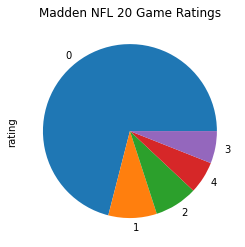

In [36]:
madden_reviews['rating'].value_counts().plot(kind='pie',title="Madden NFL 20 Game Ratings")

print('The user reviews indictated that this version of Madden reviewed poorly')